In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from graphviz import Source   # Install it using: conda install -c conda-forge python-graphviz
from IPython.display import display, SVG

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
# Load dataset
liver_patient = pd.read_csv("duomenys/Indian_Liver_Patient.csv")
liver_patient.head()

#pervadiname stulpelį dataset į liver_disease
liver_patient.rename(columns={'Dataset': 'Liver_Disease'}, inplace=True)
liver_patient['Gender'] = liver_patient['Gender'].apply(lambda x: 1 if x =='Male' else 0)
#Female=0 and Male = 1
liver_patient['Albumin_and_Globulin_Ratio'].mean()
liver_patient=liver_patient.fillna(0.94)


# Random Forest

In [3]:
# The first way
# Train/test mask
#np.random.seed(42)

#mask = np.random.random(liver_patient.shape[0]) < 0.7

#liver_patient.head()

In [4]:
#from sklearn.ensemble import RandomForestClassifier

In [5]:
# rf= RandomForestClassifier(n_estimators = 100)

In [6]:
#rf.fit(liver_patient[mask].drop('Liver_Disease', axis=1), liver_patient[mask]['Liver_Disease'])

In [7]:
#pred = rf.predict(liver_patient[~mask].drop('Liver_Disease', axis=1))

In [8]:
#acc = np.mean(pred == liver_patient[~mask]['Liver_Disease'])
#print(f'Accuracy {acc:.02%}')

In [9]:
#The second way
# prepare train and test set


X = liver_patient[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
        'Albumin', 'Albumin_and_Globulin_Ratio','Gender']]
y = liver_patient[['Liver_Disease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 10) (408, 1) (175, 10) (175, 1)


C:\Users\ligita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Score:  100.0
Random Forest Test Score:  69.14
Accuracy:  0.6914285714285714

Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.90      0.81       125
           2       0.41      0.18      0.25        50

    accuracy                           0.69       175
   macro avg       0.57      0.54      0.53       175
weighted avg       0.64      0.69      0.65       175

Confusion Matrix:
      0   1
0  112  13
1   41   9


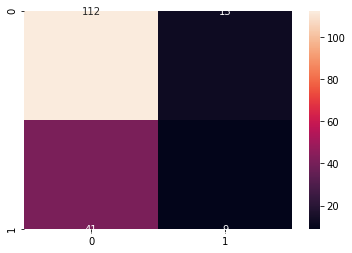

In [10]:
#np.random.seed(150)
rf = RandomForestClassifier(n_estimators=100, random_state=150)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

random_forest_score      = round(rf.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(rf.score(X_test, y_test) * 100, 2)


print('Random Forest Score: ', random_forest_score)
print('Random Forest Test Score: ', random_forest_score_test)
print('Accuracy: ', accuracy_score(y_test,rf_predicted))
print('\nClassification report: \n', classification_report(y_test,rf_predicted))
cm=pd.DataFrame(confusion_matrix(y_test,rf_predicted))
print("Confusion Matrix:\n", cm)


g = sns.heatmap(confusion_matrix(y_test,rf_predicted), annot=True, fmt="d")

# Feature importance

In [36]:
pd.DataFrame(rf.feature_importances_,
             index=liver_patient.drop('Liver_Disease', axis=1).columns)

,0
Age,0.113369
Gender,0.111641
Total_Bilirubin,0.086220
Direct_Bilirubin,0.157371
Alkaline_Phosphotase,0.125089
Alamine_Aminotransferase,0.122151
Aspartate_Aminotransferase,0.083854
Total_Protiens,0.098758
Albumin,0.084687
Albumin_and_Globulin_Ratio,0.016860


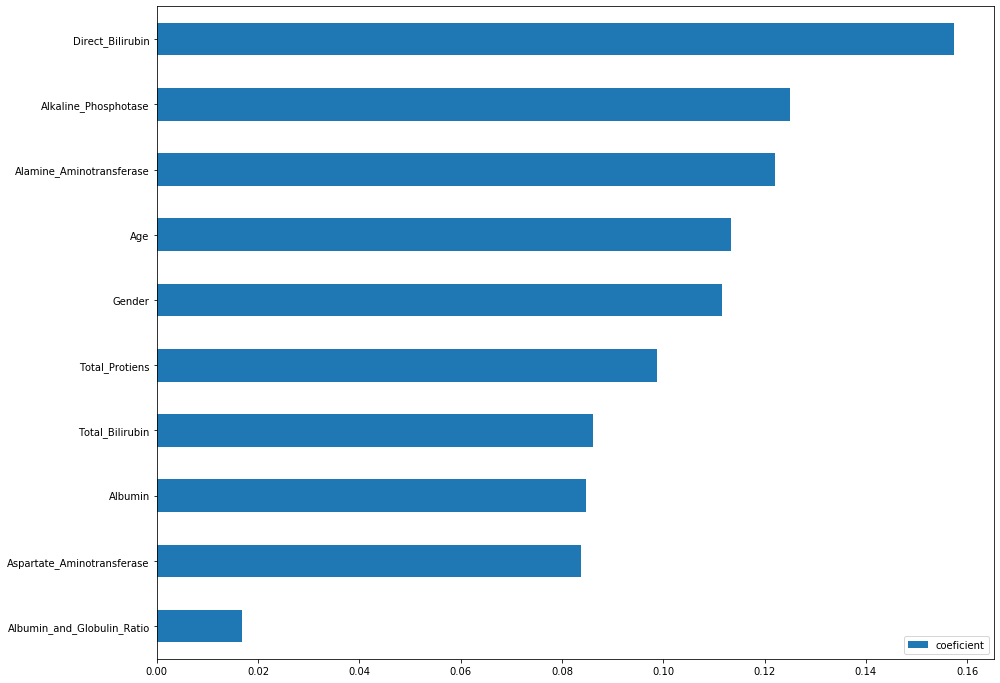

In [38]:
variable_importance=pd.DataFrame(rf.feature_importances_,columns=['coeficient'],
             index=liver_patient.drop('Liver_Disease', axis=1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

# Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree object
classifier = DecisionTreeClassifier()

# Train the model using the training sets and check score
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Decision tree Score:  100.0
Decision tree Test Score:  73.14
Accuracy:  0.6685714285714286
Confusion matrix
 [[101  24]
 [ 34  16]] 

Confusion matrix plot


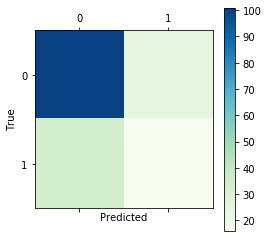

Classfication report:               precision    recall  f1-score   support

           1       0.75      0.81      0.78       125
           2       0.40      0.32      0.36        50

    accuracy                           0.67       175
   macro avg       0.57      0.56      0.57       175
weighted avg       0.65      0.67      0.66       175



In [40]:
# Predict Output

y_pred=classifier.predict(X_test)

dt_score = round(classifier.score(X_train, y_train) * 100, 2)
dt_test = round(classifier.score(X_test, y_test) * 100, 2)

decision_tree_score      = round(rf.score(X_train, y_train) * 100, 2)
decision_tree_score_test = round(rf.score(X_test, y_test) * 100, 2)

print('Decision tree Score: ', decision_tree_score)
print('Decision tree Test Score: ', decision_tree_score_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print('Classfication report:',classification_report(y_test, y_pred)) 
